# 📈📉 Product Performance Analysis

## 🎯 Objectives

This notebook explores customer behavior patterns in the e-commerce dataset. The main goals are to:


- Identify quarterly and monthly revenue trends for each category of products and seasonality.
- Identify overall top perfoming products.
- Products by shipping status; and determine revenue "holdbacks".
- Analyze regional trends for categories and products
- Find orders with high revenues that have not been "Delivered".

## 📦 Data Source


The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [7]:
# Check for nulls
# df.isna().sum()

In [5]:
# Create a copy of dataframe
df_copy = df.copy()

## Analysis

The different aspects of Product and Category Performance would be analyzed monthly, quarterly and regionally. Products generating high revenues would be considered specially as well.

### Category Revenue Trends

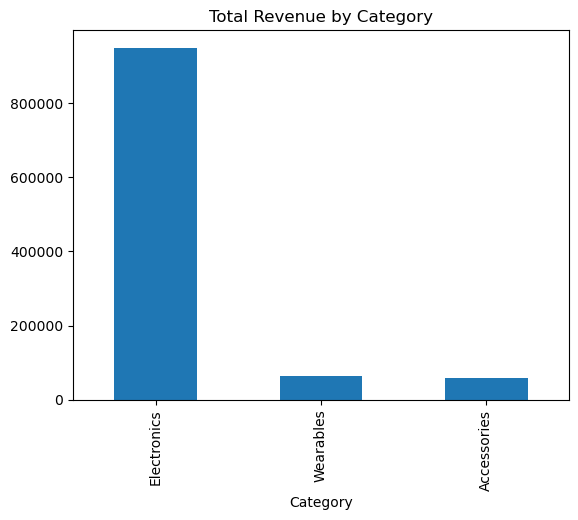

In [20]:
# Group by Category
#  Total Revenue
df_copy.groupby("Category")["Total Price Calc"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Total Revenue by Category")
plt.show();

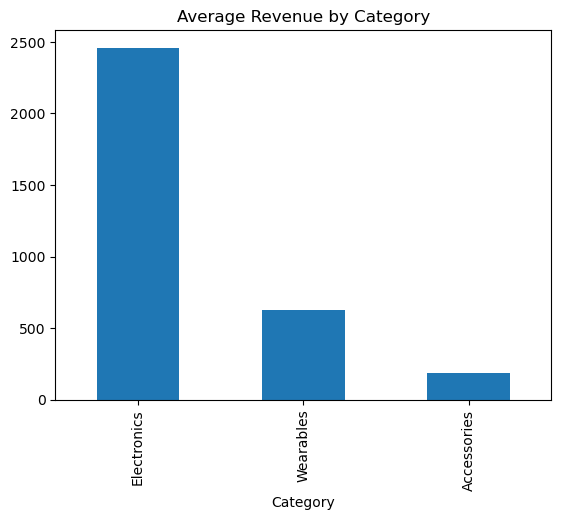

In [19]:
# Average revenue by Category
df_copy.groupby("Category")["Total Price Calc"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Revenue by Category")
plt.show();

In [ ]:
# Quarterly Revenue Trends by Category
# df_copy.groupby(by=[""])

In [8]:
df_copy.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Shipping Fee,Shipping Status,Order Date,Order Year,Order Month,Order Quarter,Order Day of Week,Order Week,Age Group,Total Price Calc
0,CUST0046,Male,West,22,Headphones,Accessories,100.0,2,6.93,In Transit,2023-04-09,2023,4,2,6,14,Young Adults,200.0
1,CUST0169,Female,South,54,Monitor,Electronics,300.0,1,11.31,Returned,2023-08-28,2023,8,3,0,35,Older Adults,300.0
2,CUST0002,Male,North,23,Headphones,Accessories,100.0,5,12.22,Delivered,2023-01-18,2023,1,1,2,3,Young Adults,500.0
3,CUST0147,Male,North,64,Smartwatch,Wearables,200.0,2,11.26,In Transit,2023-01-11,2023,1,1,2,2,Seniors,400.0
4,CUST0262,Male,East,27,Smartwatch,Wearables,200.0,1,18.38,In Transit,2023-10-23,2023,10,4,0,43,Adults,200.0


### Product Revenue Trends

### Products and Shipping Status

### Products and Shipping Fees

In [ ]:
# Pricing and Quantity Ordered

### Regional Trends For Products and Categories

### Product Orders with High revenues

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.